# Nonlinear State Estimation using Neural Contraction Metrics ([NCMs](https://arxiv.org/abs/2006.04361))
This notebook delineates how to exploit Neural Contraction Metrics (NCMs) for the state estimation of nonlinear dynamical systems.\
This software is released under the MIT License, Copyright (c) 2020 [Hiroyasu Tsukamoto](https://hirotsukamoto.com/). See [here](https://github.com/AstroHiro/ncm#license) for details.

## Required software
In addition to standard python packages like numpy, you need several other packages and software. The NCM class file [classncm.py](https://github.com/AstroHiro/ncm/blob/master/classncm.py) has been verified to work with CVXPY 1.1.1, Mosek 9.2.11, TensorFlow 2.2.0, and Keras 2.3.1.
* [Jupyter Notebook](https://jupyter.readthedocs.io/en/latest/install.html) to see and edit codes
* [CVXPY](https://www.cvxpy.org/install/index.html) and [Mosek](https://docs.mosek.com/9.2/install/installation.html) to solve convex optimization problems
* [Keras](https://keras.io/about/) and [TensorFlow](https://www.tensorflow.org/install) to construct neural networks (Keras comes packaged with TensorFlow 2.0 as tensorflow.keras)

### [NCM Class](https://github.com/AstroHiro/ncm/wiki/Documentation) ([classncm.py](https://github.com/AstroHiro/ncm/blob/master/classncm.py))
This class provides several objects and methods for designing an NCM of a given nonliner dynamical system both for state estimation and feedback control. See the [NCM](https://arxiv.org/abs/2006.04361) and the [CV-STEM](https://arxiv.org/abs/2006.04359) pepers for more details. The documentation can be found [here](https://github.com/AstroHiro/ncm/wiki/Documentation).

In [4]:
import numpy as np
from classncm import NCM
np.random.seed(seed=8)

## Example 1: Lorenz Oscillator State Estimation
We first demonstrate how to use the NCM class taking the Lorenz oscillator state estimation as an example.
### Important parameters for NCM-based estimation
* dt : float\
discrete sampling period of CV-STEM
* dynamicsf = dynamics : function - ndarray (n, ) -> (n, )\
vector field of given dynamical system, i.e. f of dx/dt = f(x)
* h_or_g = measurement : function - ndarray (n, ) -> (m, )\
measurement equation h, i.e. h of y = h(x)
* xlims : ndarray - (2,n)\
lower and upper buonds of eash state
* alims : ndarray - (2, )\
lower and upper bound of contraction rate alpha

In [5]:
# enter your choice of CV-STEM sampling period
dt = 0.05
# specify upper and lower bounds of each state
xlims = np.array([-np.ones(3),np.ones(3)])*10.0
# specify upper and lower bound of contraction rate (and we will find optimal alpha within this region)
alims = np.array([2.0,30.0])
# name your NCM
fname = "NCMlorenz"

def dynamics(x):
    """
    Enter nonlinear dynamical system of interest
        

    Parameters
    ----------
    x : ndarray - (n, )
        current state

    Returns
    -------
    dxdt : ndarray - (n, )
        time derivative of x given by dynamical system of interest

    """
    s = 10
    b = 8/3
    r = 28
    x1 = x[0]     
    x2 = x[1]    
    x3 = x[2]
    dx1dt = s*(x2-x1)
    dx2dt = x1*(r-x3)-x2
    dx3dt = x1*x2-b*x3
    dxdt = np.array([dx1dt,dx2dt,dx3dt])
    return dxdt

def measurement(x):
    """
    Enter nonlinear measurement equation
        

    Parameters
    ----------
    x : ndarray - (n, )
        current state

    Returns
    -------
    y : ndarray - (n, )
        measurement, i.e. y of y = h(x) where h is measurement equation

    """
    y = np.array([[1,0,0]])@x
    return y

ncm = NCM(dt,dynamics,measurement,xlims,alims,"est",fname)

### [NCM train method](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-train)
This method trains a neural network to be used for designing an NCM and returns a Keras neural network model. See [here](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-train) for the explanation on this method.

In [6]:
# You can use ncm.train(iTrain = 0) instead when using pre-traind NCM models.
ncm.train()

============= LINE SEARCH OF OPTIMAL ALPHA =============
Optimal value: Jcv = 9.69 ( alpha = 2.000 )
Optimal value: Jcv = 9.45 ( alpha = 2.100 )
Optimal value: Jcv = 9.33 ( alpha = 2.200 )
Optimal value: Jcv = 9.24 ( alpha = 2.300 )
Optimal value: Jcv = 9.19 ( alpha = 2.400 )
Optimal value: Jcv = 9.44 ( alpha = 2.500 )
Optimal contraction rate: alpha = 2.400
=========== LINE SEARCH OF OPTIMAL ALPHA END ===========


====== SAMPLING OF CONTRACTION METRICS BY CV-STEM ======
# sampled metrics:  0 ...
# sampled metrics:  100 ...
# sampled metrics:  200 ...
# sampled metrics:  300 ...
# sampled metrics:  400 ...
# sampled metrics:  500 ...
# sampled metrics:  600 ...
# sampled metrics:  700 ...
# sampled metrics:  800 ...
# sampled metrics:  900 ...
Optimal steady-state estimation error = 9.57
Directory models/optvals/NCMlorenz already exists
==== SAMPLING OF CONTRACTION METRICS BY CV-STEM END ====


=================== NCM CONSTRUCTION ===================
Model: "NCM"
_____________________

Epoch 98/10000
29/29 - 0s - loss: 0.0102 - val_loss: 0.0177
Epoch 99/10000
29/29 - 0s - loss: 0.0114 - val_loss: 0.0185
Epoch 100/10000
29/29 - 0s - loss: 0.0107 - val_loss: 0.0193
Epoch 101/10000
29/29 - 0s - loss: 0.0112 - val_loss: 0.0192
Epoch 102/10000
29/29 - 0s - loss: 0.0093 - val_loss: 0.0196
Epoch 103/10000
29/29 - 0s - loss: 0.0099 - val_loss: 0.0218
Epoch 104/10000
29/29 - 0s - loss: 0.0103 - val_loss: 0.0222
Epoch 105/10000
29/29 - 0s - loss: 0.0119 - val_loss: 0.0207
Epoch 106/10000
29/29 - 0s - loss: 0.0124 - val_loss: 0.0208
Epoch 107/10000
29/29 - 0s - loss: 0.0102 - val_loss: 0.0235
Epoch 108/10000
29/29 - 0s - loss: 0.0111 - val_loss: 0.0208
Epoch 109/10000
29/29 - 0s - loss: 0.0106 - val_loss: 0.0195
Epoch 110/10000
29/29 - 0s - loss: 0.0124 - val_loss: 0.0185
================= NCM CONSTRUCTION END =================


### [NCM simulation method](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-simulation)
This method performs NCM-based estimation of a given nonlinear dynamical system and generates figures of simulation results on state and tracking error histories. See [here](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-simulation) for the explanation on this method.

====================== SIMULATIOM ======================
time step = 0.05
terminal time = 50
initial state = [ 0.1  0.1 -0.1]
estimated initial state = [-7.8  7.8 -7.1]
=================== ESTIMATION ERROR ===================


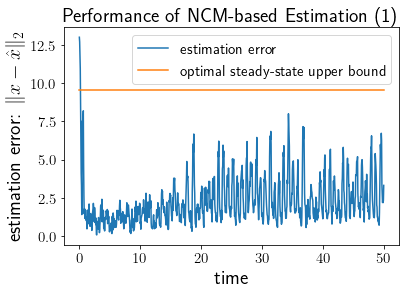

============ ESTIMATION ERROR OF EACH STATE ============


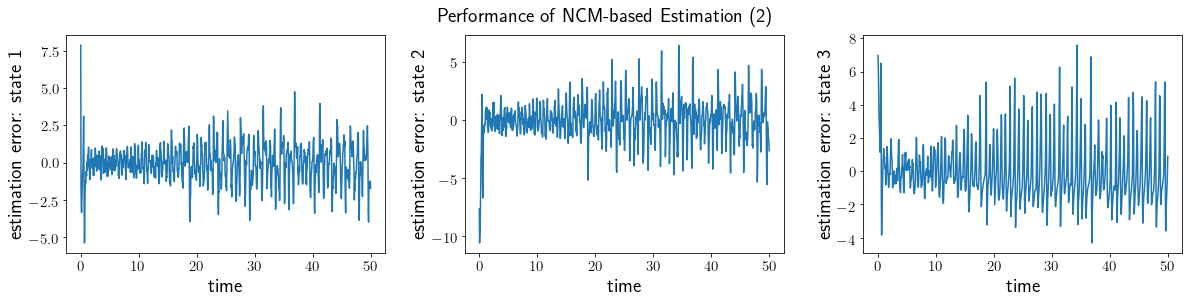

==================== SIMULATIOM END ====================


In [8]:
# terminal time
tf = 50
# initial state
x0 = np.array([0.1,0.1,-0.1])
# estimated initial state
z0 = np.random.uniform(low=xlims[0,:],high=xlims[1,:])
# simulation
this,xhis,zhis = ncm.simulation(dt,tf,x0,z0,Ncol=3,FigSize=(20,4))

## Example 2: State Estimation of Spacecraft Simulator
We use NCMs for esitimating the state of spacecraft simulator, the dynamical system of which is given in https://authors.library.caltech.edu/88874/.
### Important parameters for NCM-based estimation
* dt : float\
discrete sampling period of CV-STEM
* dynamicsf = dynamics : function - ndarray (n, ) -> (n, )\
vector field of given dynamical system, i.e. f of dx/dt = f(x)
* h_or_g = measurement : function - ndarray (n, ) -> (m, )\
measurement equation h, i.e. h of y = h(x)
* xlims : ndarray - (2,n)\
lower and upper buonds of eash state
* alims : ndarray - (2, )\
lower and upper bound of contraction rate alpha

In [9]:
# enter your choice of CV-STEM sampling period
dt = 10
# specify upper and lower bounds of each state
xlims = np.array([-np.ones(6),np.ones(6)])*15
# specify upper and lower bound of contraction rate (and we will find optimal alpha within this region)
alims = np.array([0.1,30])
# name your NCM
fname = "NCMsc"

def dynamics(x):
    """
    Enter nonlinear dynamical system of interest
        

    Parameters
    ----------
    x : ndarray - (n, )
        current state

    Returns
    -------
    dxdt : ndarray - (n, )
        time derivative of x given by dynamical system of interest

    """
    A = np.array([[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],\
                  [0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])
    dxdt = A@x
    return dxdt

def measurement(x):
    """
    Enter nonlinear measurement equation
        

    Parameters
    ----------
    x : ndarray - (n, )
        current state

    Returns
    -------
    y : ndarray - (n, )
        measurement, i.e. y of y = h(x) where h is measurement equation

    """
    xcams = np.array([[10,0,0],[0,10,0],[0,0,10],[10,10,5]])
    y = np.zeros(4)
    for i in range(4):
        y[i] = np.linalg.norm(x[0:3]-xcams[i,:])
    return y

# In this case, we select non-default upper bounds for process and measurement noise (d1_over=1 and d2_over=0.05).
ncm = NCM(dt,dynamics,measurement,xlims,alims,"est",fname,d1_over=1,d2_over=0.05)

### [NCM train method](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-train)
This method trains a neural network to be used for designing an NCM and returns a Keras neural network model. See [here](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-train) for the explanation on this method.

In [10]:
# Instead of the default Bw (matrix acting on process noise), let us use the following physics-inspired Bw.
Cd = 0.5
r = 0.1
Area = np.pi*r**2
rho = 1.2
V = 2.0
d = 1/2*Cd*rho*Area*V**2
Bw = np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,d,0,0],[0,0,0,0,d,0],[0,0,0,0,0,d]])
ncm.Bw = lambda x: Bw
# You can use ncm.train(iTrain = 0) instead when using pre-traind NCM models.
ncm.train()

============= LINE SEARCH OF OPTIMAL ALPHA =============
Optimal value: Jcv = 8.78 ( alpha = 0.100 )
Optimal value: Jcv = 5.40 ( alpha = 0.200 )
Optimal value: Jcv = 4.28 ( alpha = 0.300 )
Optimal value: Jcv = 3.88 ( alpha = 0.400 )
Optimal value: Jcv = 3.96 ( alpha = 0.500 )
Optimal contraction rate: alpha = 0.400
=========== LINE SEARCH OF OPTIMAL ALPHA END ===========


====== SAMPLING OF CONTRACTION METRICS BY CV-STEM ======
# sampled metrics:  0 ...
# sampled metrics:  100 ...
# sampled metrics:  200 ...
# sampled metrics:  300 ...
# sampled metrics:  400 ...
# sampled metrics:  500 ...
# sampled metrics:  600 ...
# sampled metrics:  700 ...
# sampled metrics:  800 ...
# sampled metrics:  900 ...
Optimal steady-state estimation error = 4.54
Directory models/optvals/NCMsc already exists
==== SAMPLING OF CONTRACTION METRICS BY CV-STEM END ====


=================== NCM CONSTRUCTION ===================
Model: "NCM"
_________________________________________________________________
Lay

Epoch 99/10000
29/29 - 0s - loss: 0.0019 - val_loss: 0.0044
Epoch 100/10000
29/29 - 0s - loss: 0.0017 - val_loss: 0.0043
Epoch 101/10000
29/29 - 0s - loss: 0.0017 - val_loss: 0.0042
Epoch 102/10000
29/29 - 0s - loss: 0.0017 - val_loss: 0.0043
Epoch 103/10000
29/29 - 0s - loss: 0.0018 - val_loss: 0.0045
Epoch 104/10000
29/29 - 0s - loss: 0.0018 - val_loss: 0.0044
Epoch 105/10000
29/29 - 0s - loss: 0.0018 - val_loss: 0.0039
Epoch 106/10000
29/29 - 0s - loss: 0.0017 - val_loss: 0.0042
Epoch 107/10000
29/29 - 0s - loss: 0.0017 - val_loss: 0.0045
Epoch 108/10000
29/29 - 0s - loss: 0.0018 - val_loss: 0.0039
Epoch 109/10000
29/29 - 0s - loss: 0.0015 - val_loss: 0.0043
Epoch 110/10000
29/29 - 0s - loss: 0.0016 - val_loss: 0.0040
Epoch 111/10000
29/29 - 0s - loss: 0.0015 - val_loss: 0.0041
Epoch 112/10000
29/29 - 0s - loss: 0.0016 - val_loss: 0.0039
Epoch 113/10000
29/29 - 0s - loss: 0.0017 - val_loss: 0.0036
Epoch 114/10000
29/29 - 0s - loss: 0.0016 - val_loss: 0.0039
Epoch 115/10000
29/29 - 0

Epoch 231/10000
29/29 - 0s - loss: 6.0467e-04 - val_loss: 0.0023
Epoch 232/10000
29/29 - 0s - loss: 6.4696e-04 - val_loss: 0.0025
Epoch 233/10000
29/29 - 0s - loss: 7.2983e-04 - val_loss: 0.0026
Epoch 234/10000
29/29 - 0s - loss: 8.2371e-04 - val_loss: 0.0025
Epoch 235/10000
29/29 - 0s - loss: 6.7463e-04 - val_loss: 0.0023
Epoch 236/10000
29/29 - 0s - loss: 8.1795e-04 - val_loss: 0.0028
Epoch 237/10000
29/29 - 0s - loss: 8.8556e-04 - val_loss: 0.0027
Epoch 238/10000
29/29 - 0s - loss: 8.7484e-04 - val_loss: 0.0028
Epoch 239/10000
29/29 - 0s - loss: 8.9370e-04 - val_loss: 0.0030
Epoch 240/10000
29/29 - 0s - loss: 8.2393e-04 - val_loss: 0.0025
Epoch 241/10000
29/29 - 0s - loss: 0.0011 - val_loss: 0.0027
Epoch 242/10000
29/29 - 0s - loss: 9.4025e-04 - val_loss: 0.0023
Epoch 243/10000
29/29 - 0s - loss: 8.5755e-04 - val_loss: 0.0026
Epoch 244/10000
29/29 - 0s - loss: 7.2364e-04 - val_loss: 0.0023
================= NCM CONSTRUCTION END =================


### [NCM simulation method](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-simulation)
This method performs NCM-based estimation of a given nonlinear dynamical system and generates figures of simulation results on state and tracking error histories. See [here](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-simulation) for the explanation on this method.

====================== SIMULATIOM ======================
time step = 1
terminal time = 50
initial state = [0 0 0 0 0 0]
estimated initial state = [-10.2  -4.4   2.6  12.2   2.1  -6.6]
=================== ESTIMATION ERROR ===================


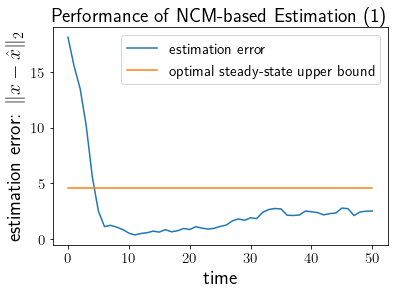

============ ESTIMATION ERROR OF EACH STATE ============


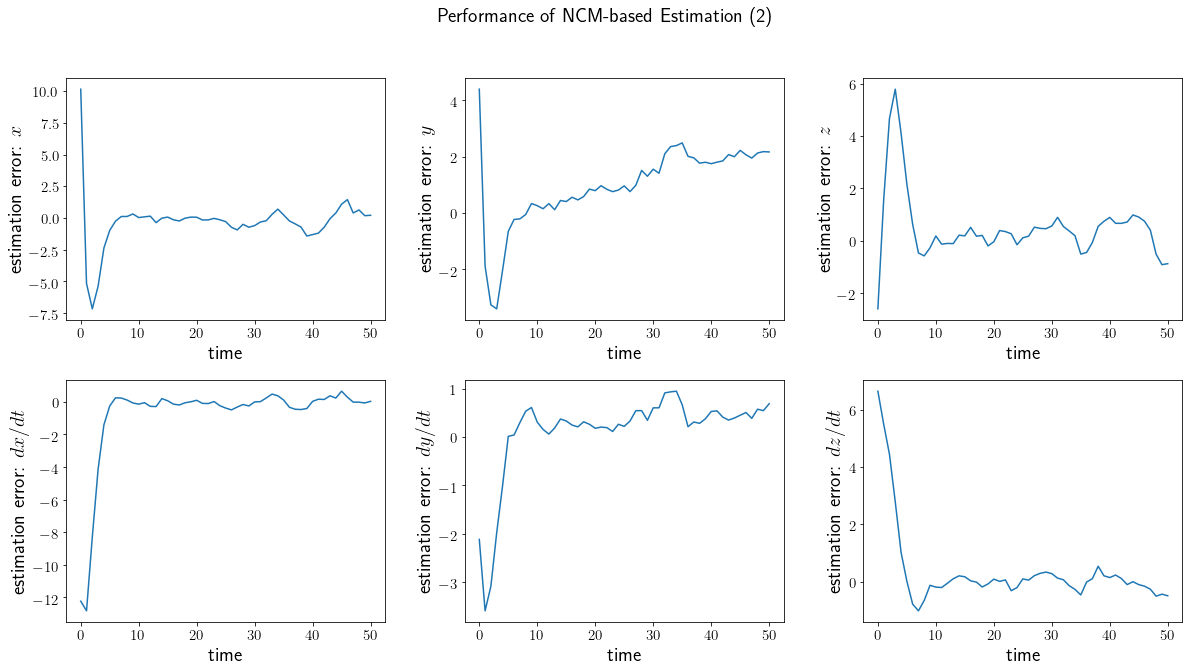

==================== SIMULATIOM END ====================


In [11]:
# simultion time step
dt = 1
# terminal time
tf = 50
# initial state
x0 = np.array([0,0,0,0,0,0])
# estimated initial state
z0 = np.random.uniform(low=xlims[0,:],high=xlims[1,:])
# simulation
snames = [r"$x$",r"$y$",r"$z$",r"$dx/dt$",r"$dy/dt$",r"$dz/dt$"]
this,xhis,zhis = ncm.simulation(dt,tf,x0,z0,xnames=snames,Ncol=3,FigSize=(20,10))   

## It's Your Turn
Here is the list of things you need at least.
* nonlinear dynamical system
* nonlinear measurement equation
* state space of interest
* your guess of contraction rate (just put a small number if not sure)

In [ ]:
# enter your choice of CV-STEM sampling period
dt = 0.1
# specify upper and lower bounds of each state
xlims = np.array([-np.ones(3),np.ones(3)])*10.0
# specify upper and lower bound of contraction rate (and we will find optimal alpha within this region)
alims = np.array([2.0,30.0])
# name your NCM
fname = "yourNCMestimation" 

def dynamics(x):
    """
    Enter nonlinear dynamical system of interest
        

    Parameters
    ----------
    x : ndarray - (n, )
        current state

    Returns
    -------
    dxdt : ndarray - (n, )
        time derivative of x given by dynamical system of interest

    """
    pass

def measurement(x):
    """
    Enter nonlinear measurement equation
        

    Parameters
    ----------
    x : ndarray - (n, )
        current state

    Returns
    -------
    y : ndarray - (n, )
        measurement, i.e. y of y = h(x) where h is measurement equation

    """
    pass

ncm = NCM(dt,dynamics,measurement,xlims,alims,"est",fname)

### [NCM train method](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-train)
This method trains a neural network to be used for designing an NCM and returns a Keras neural network model. See [here](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-train) for the explanation on this method.

In [ ]:
ncm.train()

### [NCM simulation method](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-simulation)
This method performs NCM-based estimation of a given nonlinear dynamical system and generates figures of simulation results on state and tracking error histories. See [here](https://github.com/AstroHiro/ncm/wiki/NCM-methods:-simulation) for the explanation on this method.

In [ ]:
# simultion time step
dt = 0.1
# terminal time
tf = 50
# initial state
x0 = np.random.uniform(low=xlims[0,:],high=xlims[1,:])
# estimated initial state
z0 = np.random.uniform(low=xlims[0,:],high=xlims[1,:])
# simulation
this,xhis,zhis = ncm.simulation(dt,tf,x0,z0,Ncol=2,FigSize=(20,20))